# Diabetes_Patients_Analysis (Project 2)

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Load Data

In [3]:
df=pd.read_csv("C:\\Users\\user\\Downloads\\Project 2 MeriSKILL\\diabetes.csv")

In [4]:
print("Dataset Information")
df.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print("First Few Rows of the Dataset")
df.head()

First Few Rows of the Dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
print("Missing Values")
df.isnull().sum()

Missing Values


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
print('Summary Statistics')
df.describe()

Summary Statistics


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


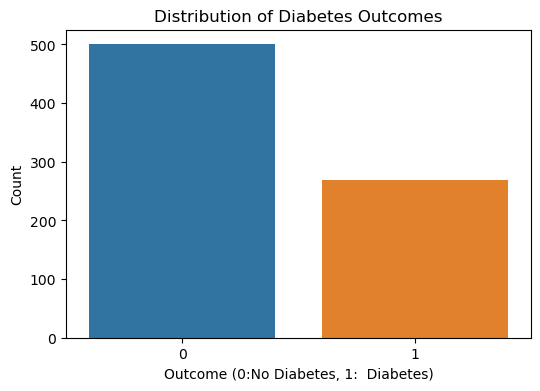

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcomes')
plt.xlabel('Outcome (0:No Diabetes, 1:  Diabetes)')
plt.ylabel('Count')
plt.show()

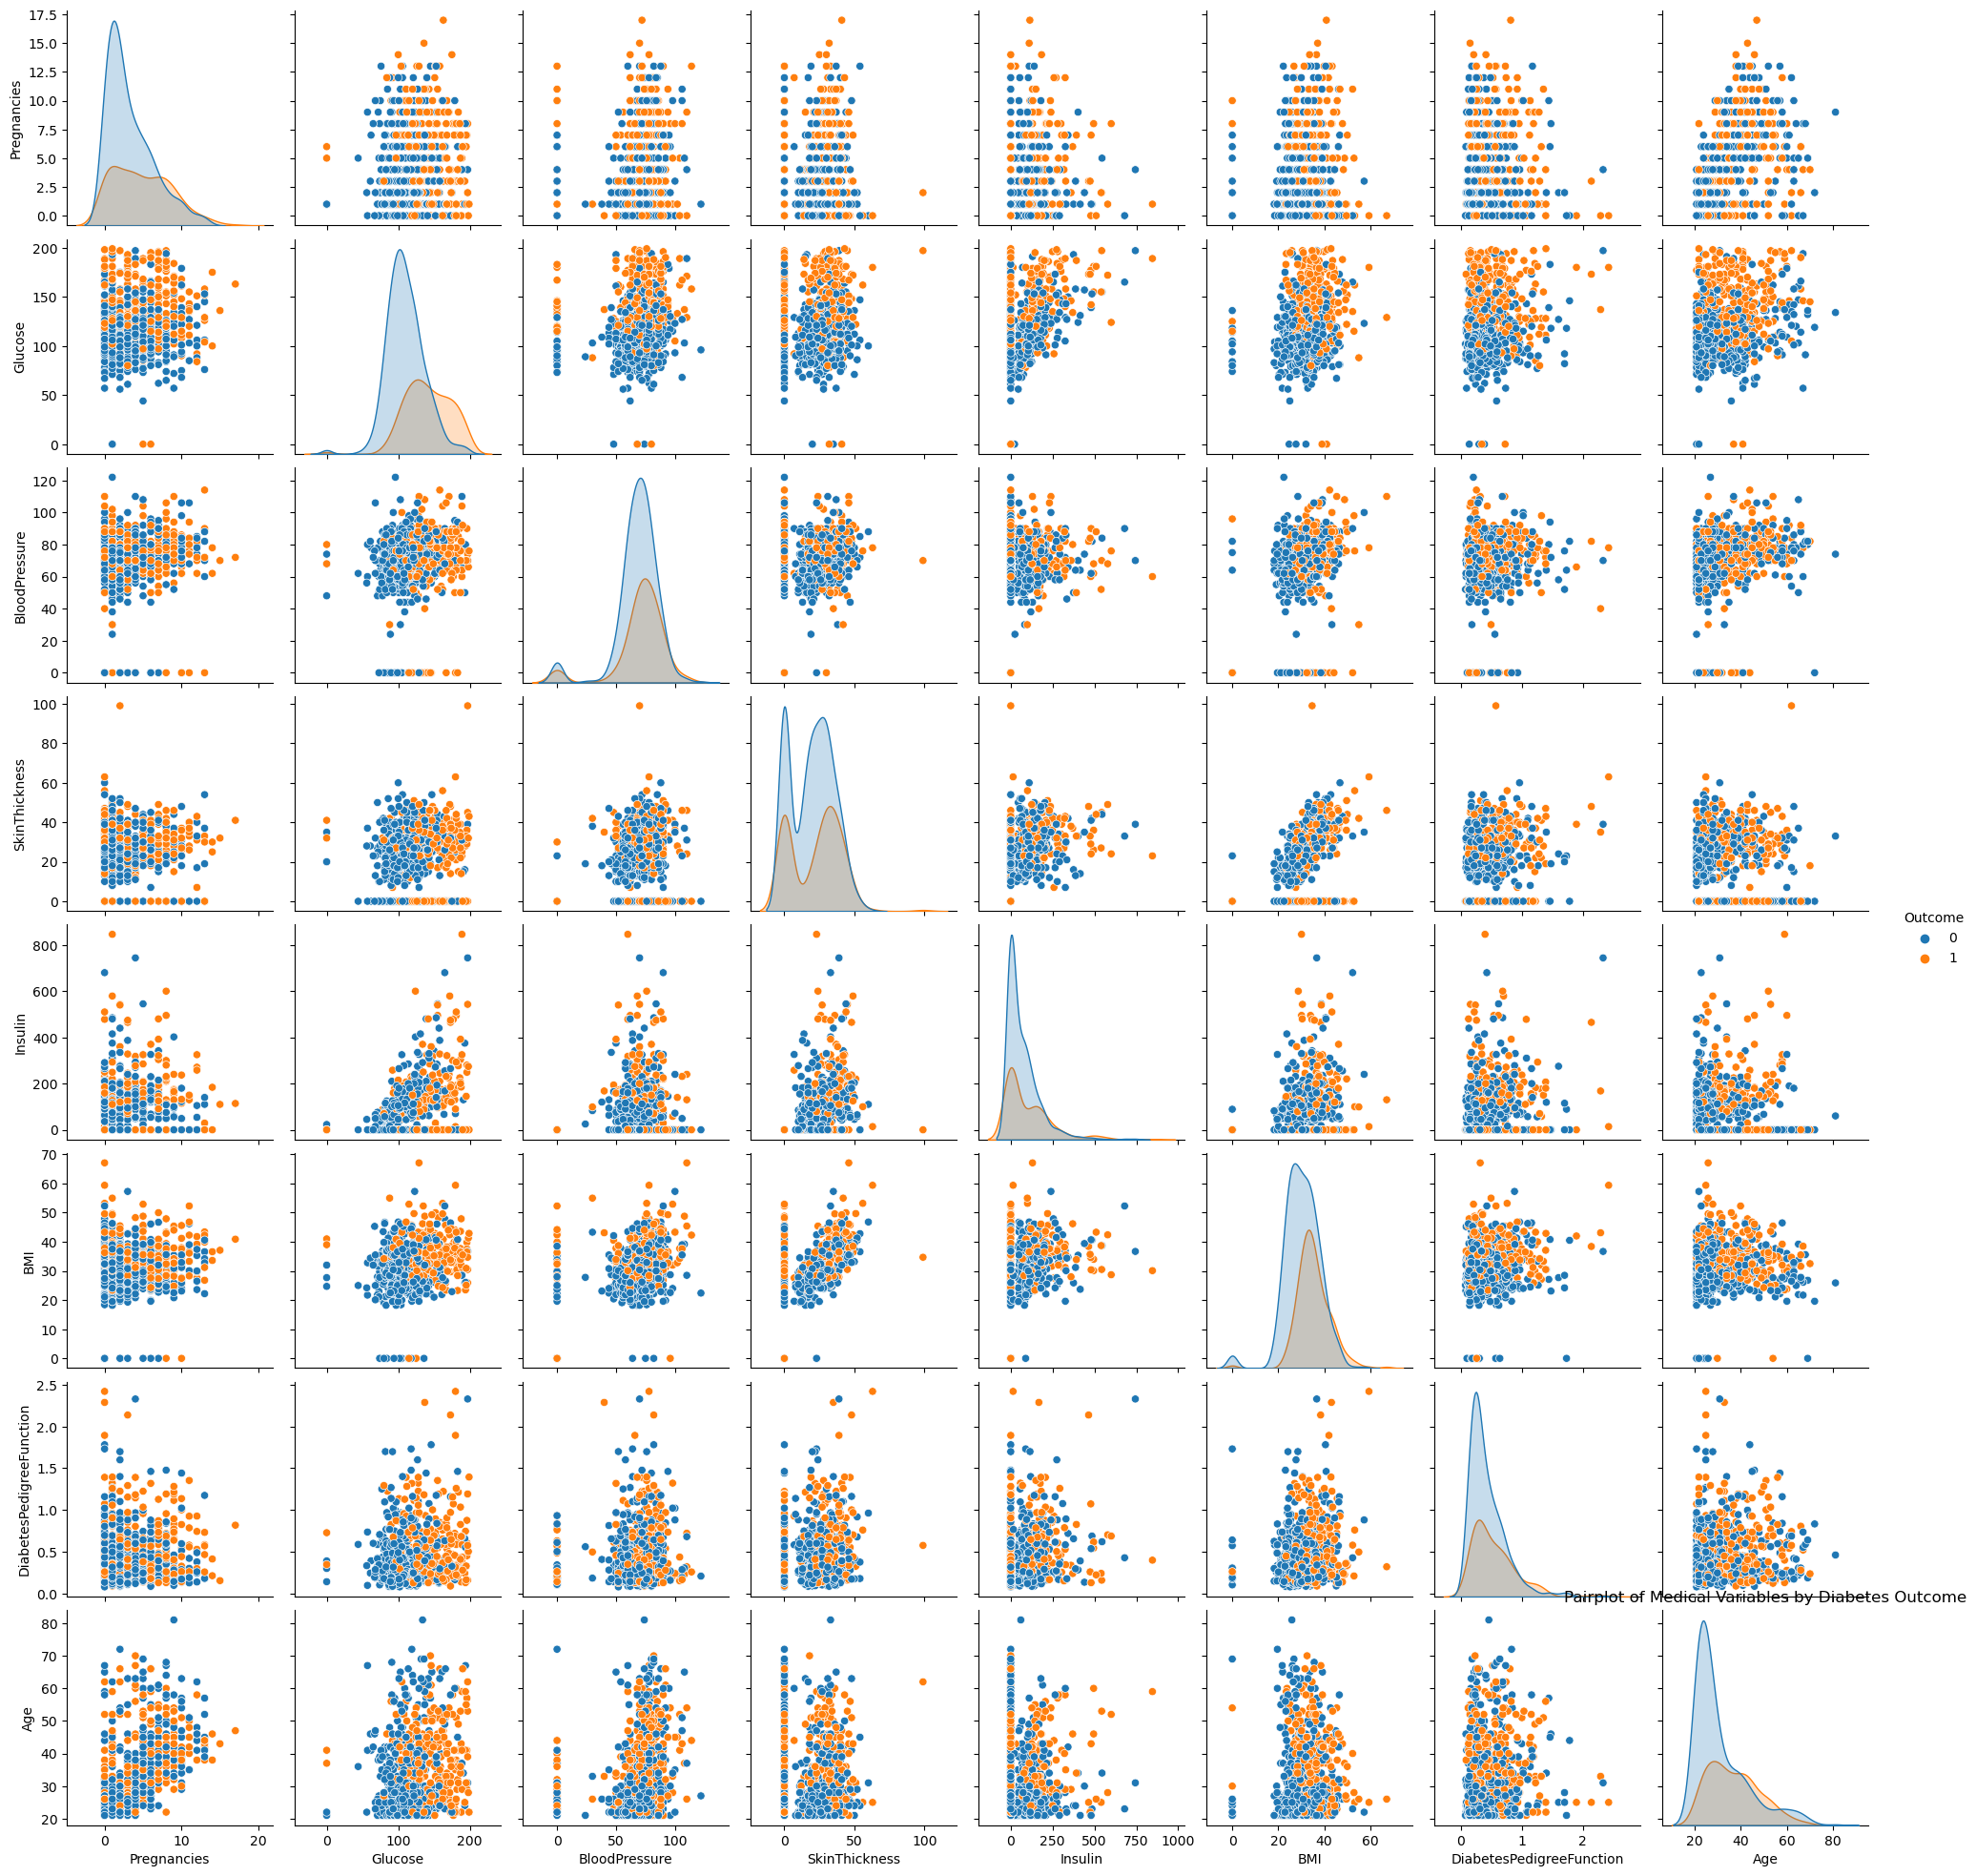

In [30]:
sns.pairplot(df,hue='Outcome')
plt.title('Pairplot of Medical Variables by Diabetes Outcome')
plt.show()

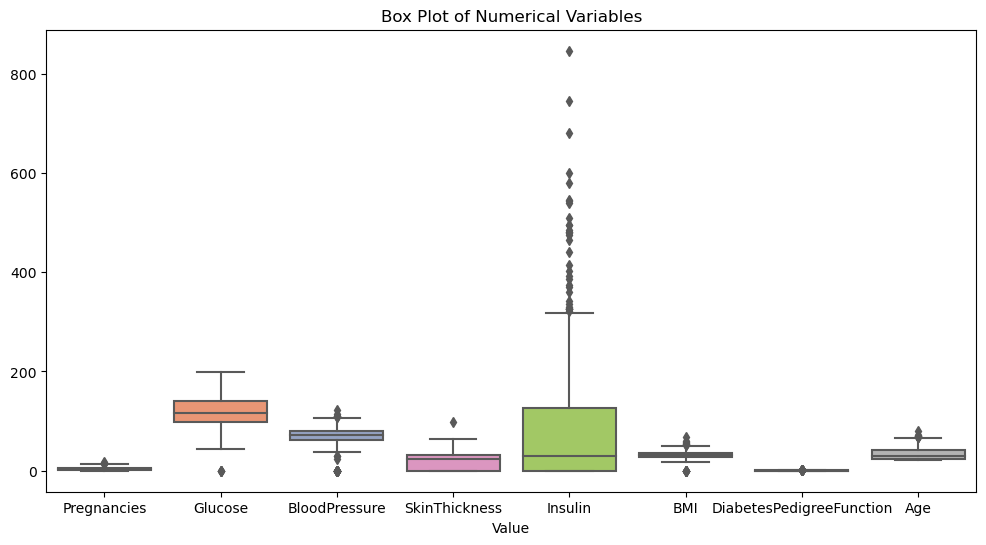

In [10]:
numerical_columns=df.select_dtypes(include=['number']).drop(columns=['Outcome'])
plt.figure(figsize=(12,6))
ax=sns.boxplot(data=numerical_columns, orient="v", palette="Set2")
plt.title('Box Plot of Numerical Variables')
plt.xlabel('Value')
plt.show()

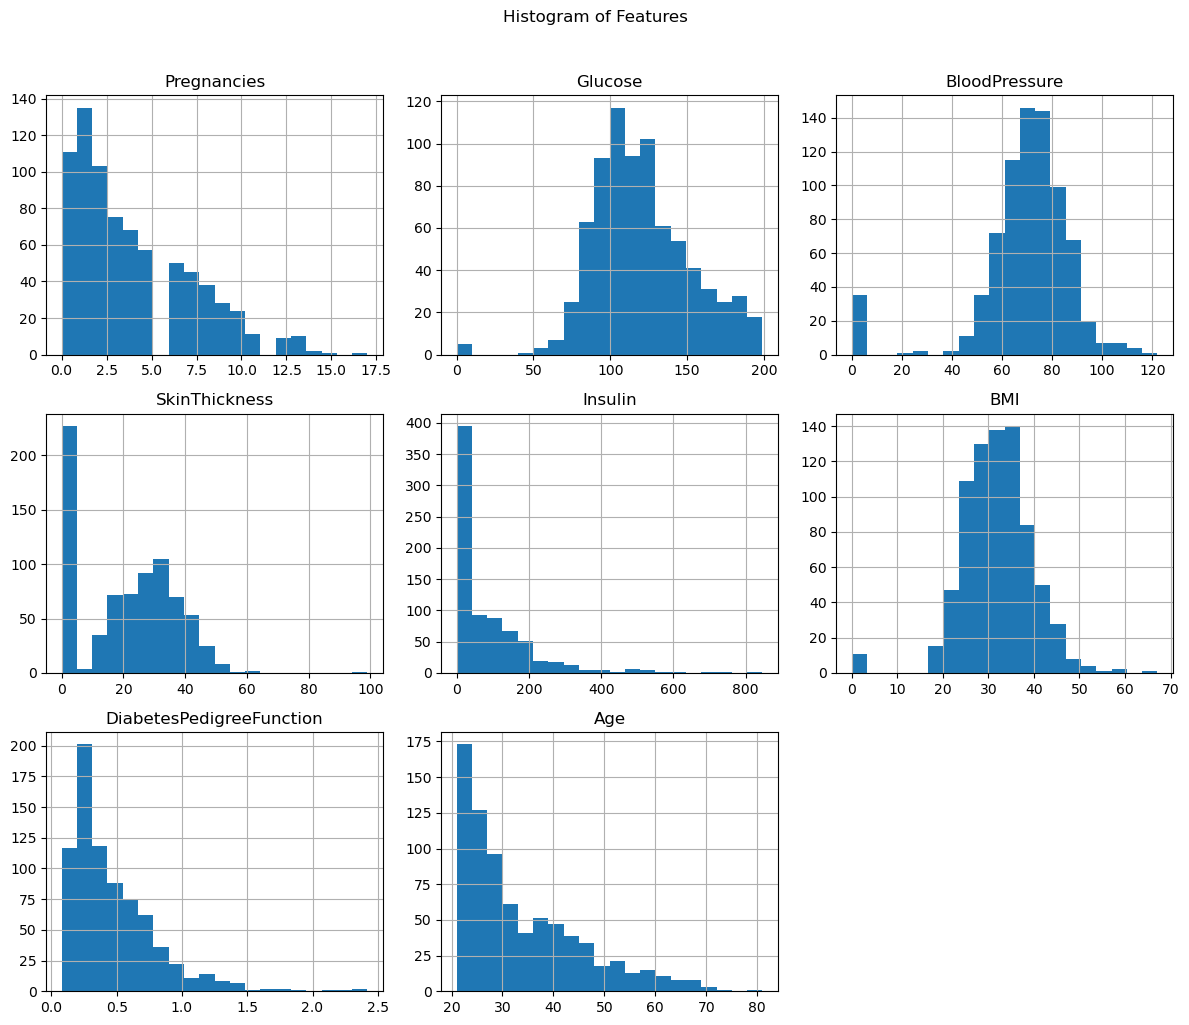

In [11]:
df.drop("Outcome",axis=1).hist(bins=20,figsize=(12,10))
plt.suptitle("Histogram of Features", y=1.02)
plt.tight_layout()
plt.show()

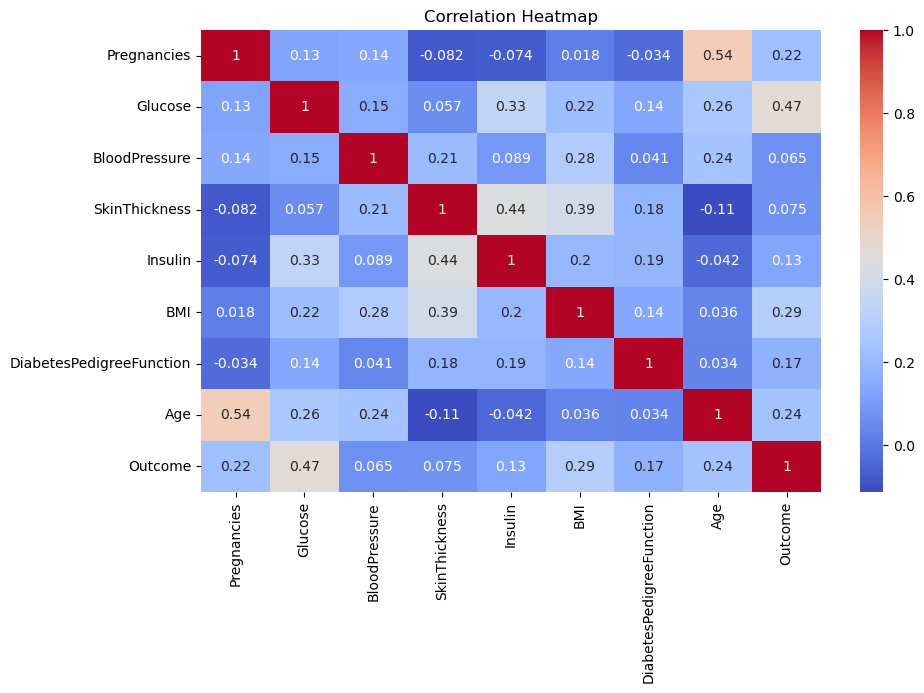

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
x=df.drop("Outcome", axis=1)
y=df["Outcome"]
X_train,x_test,Y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Finding Best Feature From The Data

In [14]:
K_best= SelectKBest(score_func=mutual_info_classif, k=1)
X_new=K_best.fit_transform(x,y)
selected_feature_indices=K_best.get_support(indices=True)
selected_features=x.columns[selected_feature_indices]

In [15]:
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Glucose'], dtype='object')


## Modeling

In [16]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM' : SVC(),
    'K-NN': KNeighborsClassifier()
}

In [17]:
model_accuracies={}

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

In [19]:
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress ConvergenceWarnings for demonstration purposes
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Assuming X_train and X_test are your feature matrices
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

# Logistic Regression with increased max_iter and scaled data
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, Y_train)

# Prediction
y_pred = logistic_model.predict(x_test_scaled)

# Accuracy calculation or any other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7532467532467533


In [20]:
for model_name, model in models.items():
    model.fit(X_train,Y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name]=accuracy

In [21]:
best_model=max(model_accuracies, key=model_accuracies.get)
print("Model Accuracies:")
for model_name,accuracy in model_accuracies.items():
    print(f"{model_name}:{accuracy:2f}")

acc=model_accuracies[best_model]
acc=acc*100
print(f"Best Model: {best_model} with accuracy {acc:.0f}%")

Model Accuracies:
Logistic Regression:0.746753
Decision Tree:0.733766
Random Forest:0.727273
SVM:0.766234
K-NN:0.662338
Best Model: SVM with accuracy 77%


In [22]:
print("SUMMARY")
print(f"Important Feature|> ({selected_features[0]}")
print(f"Best Model|>{best_model} with accuracy {acc:0f}%")

SUMMARY
Important Feature|> (Glucose
Best Model|>SVM with accuracy 76.623377%


# Testing

In [23]:
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [26]:
# Hyperparameter tuning for KNN
knn_model = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 71))}
cv_classifier = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring="accuracy")
cv_classifier.fit(X_train, Y_train)
best_param = cv_classifier.best_params_
print("Best Param: ", best_param)

# Extract the best number of neighbors
best_neighbor = best_param['n_neighbors']

# KNN Model with the best parameters
knn_model = KNeighborsClassifier(n_neighbors=best_neighbor)
knn_model.fit(X_train, Y_train)

# Prediction
knn_test_prediction = knn_model.predict(x_test)
knn_train_prediction = knn_model.predict(X_train)

# Accuracy
knn_test_accuracy = accuracy_score(y_test, knn_test_prediction)
knn_train_accuracy = accuracy_score(Y_train, knn_train_prediction)
KNN_CV = cross_val_score(knn_model, x_test, y_test, cv=5, scoring="accuracy").mean()

# Evaluation metrics
print("Model_Train_Accuracy :", knn_train_accuracy)
print("Model_Test_Accuracy :", knn_test_accuracy)
print("Cross Validation Score :", KNN_CV)

Best Param:  {'n_neighbors': 11}
Model_Train_Accuracy : 0.7915309446254072
Model_Test_Accuracy : 0.7077922077922078
Cross Validation Score : 0.7597849462365591


In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming you have previously trained a KNN model and have access to it as knn_model
# Also, assuming train_data represents the dataset used during training

# Define your scaler
scaler = StandardScaler()
#input_data = (2, 174, 88, 37, 120, 44.5, 0.646, 24)
input_data = (6, 179, 99, 45, 140, 48.5, 0.686, 34)
# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
# standardize the input data
scaler.fit(X_train)
std_data = scaler.transform(input_data_reshaped)
prediction = knn_model.predict(std_data)
print(prediction)
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


In [29]:
pregnancies = float(input("Enter the number of Pregnancies: "))
glucose = float(input("Enter Glucose level: "))
blood_pressure = float(input("Enter Blood Pressure: "))
skin_thickness = float(input("Enter Skin Thickness: "))
insulin = float(input("Enter Insulin level: "))
bmi = float(input("Enter BMI: "))
diabetes_pedigree = float(input("Enter Diabetes Pedigree Function: "))
age = float(input("Enter Age: "))

input_data = (pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age)

# Rest of your code for data processing and prediction
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshaped)
prediction = knn_model.predict(std_data)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

Enter the number of Pregnancies: 55
Enter Glucose level: 180
Enter Blood Pressure: 100
Enter Skin Thickness: 50
Enter Insulin level: 140
Enter BMI: 48.8
Enter Diabetes Pedigree Function: 0.88
Enter Age: 34
The person is diabetic
